In [ ]:
!pip install pushshift_py

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pushshift_py import PushshiftAPI

In [ ]:
!pip install praw
import praw
user_agent = "Scraper 1.0 by /u/g__nghi"
reddit = praw.Reddit(
    client_id="GOBtczLCERB8gLkoxjNEHA",
    client_secret="Jr2oOcCZKtqF9EI_Zg1ukRT6KghM8w",
    user_agent=user_agent
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
#hot new rising top
headlines = set()
for submission in reddit.subreddit('stocks').hot(limit=None):
  #print(submission.title)
  #print(submission.id)
  #print(submission.author)
  #print(submission.created_utc)
  #print(submission.score)
  #print(submission.upvote_ratio)
  #print(submission.url)
  #break
  headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



329


In [ ]:
df = pd.DataFrame(headlines)
df.head()

,0
0,Chargepoint or Blink?
1,Is Take-Two’s stock a buy before the GTA 6 tra...
2,Paramount Group (PGRE) - Office Reit Contraria...
3,A consensus on inflation?
4,STMicroelectronics (STM) is one of the best an...


In [ ]:
df.to_csv('headlines.csv', header=False, encoding='utf-8', index=False)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line) #-> dict
  pol_score['headline'] = line
  results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'r/Stocks Daily Discussion & Fundamentals Friday Dec 01, 2023',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4767,
  'headline': 'New US SEC rules effective January 2nd, 2024, and its influence on the stock '
              'market.',
  'neg': 0.0,
  'neu': 0.819,
  'pos': 0.181},
 {'compound': 0.0,
  'headline': 'Looking at patterns in the market',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,1.000,0.000,0.0000,r/Stocks Daily Discussion & Fundamentals Frida...
1,0.0,0.819,0.181,0.4767,"New US SEC rules effective January 2nd, 2024, ..."
2,0.0,1.000,0.000,0.0000,Looking at patterns in the market
3,0.0,1.000,0.000,0.0000,Is INTC (Intel) undervalued?
4,0.0,1.000,0.000,0.0000,"So what do you guys consider ""the market"""


In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,1.000,0.000,0.0000,r/Stocks Daily Discussion & Fundamentals Frida...,0
1,0.0,0.819,0.181,0.4767,"New US SEC rules effective January 2nd, 2024, ...",1
2,0.0,1.000,0.000,0.0000,Looking at patterns in the market,0
3,0.0,1.000,0.000,0.0000,Is INTC (Intel) undervalued?,0
4,0.0,1.000,0.000,0.0000,"So what do you guys consider ""the market""",0


In [ ]:
df2 = df[['headline', 'label']]

In [ ]:
df2.to_csv('reddit_headlines_labels.csv', encoding='utf-8', index=False)

In [ ]:
df.label.value_counts(normalize=True) * 100

In [ ]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df["label"] == -1].headline)[:5], width=200)

Positive headlines:

['New US SEC rules effective January 2nd, 2024, and its influence on the stock market.',
 'Clean Harbors (CLH) expands buyback program',
 'Coinbase rapid value increase',
 'Are government bonds a good play right now? (US)',
 'Energy stock or semiconductor stock?']

Negative headlines:

['Moody’s cut China’s credit outlook to negative on rising debt risks',
 'RIOT and MARA',
 'Trading on Terror? Short-selling Israeli ETFs before Oct 7 attack',
 'US Retail Group retracts claim that half of inventory loss was due to theft',
 'Wall Street Journal - Investors See Interest-Rate Cuts Coming Soon, Recession or Not']


AttributeError: ignored

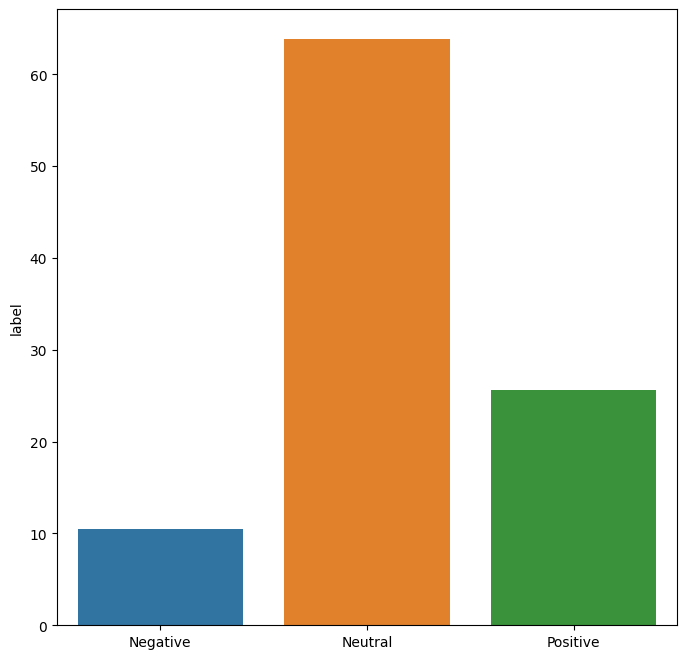

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set.ylabel("Percentage")

plt.show()